<a href="https://colab.research.google.com/github/astro-blue/Data-analysis-in-astronomy-2022/blob/main/week_14/Neural_network_in_class_to_device.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pytorch basic first : linear regression

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/Colab Notebooks/"

Mounted at /content/gdrive


In [ ]:
import astropy.io.fits as pf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


### A simple case: linear regression with Pytorch framework


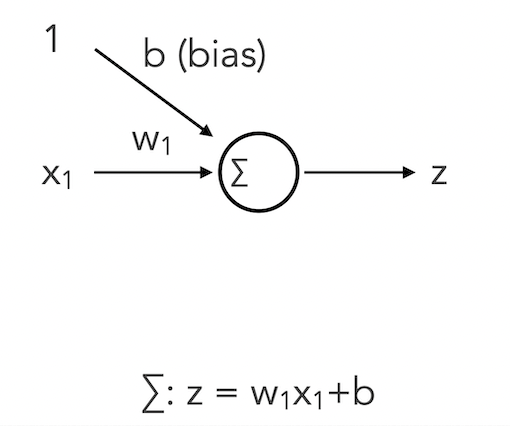

In [ ]:
import torch
from torchsummary import summary
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

class linearRegression(torch.nn.Module):         #  This is the basic structure of a model used by Pytorch
    def __init__(self):                          #  Object-oriented programming
        super(linearRegression, self).__init__() #
        '''
        Below is the part you can start to develop
        '''
        inputSize=1
        outputSize=1
        self.linear = torch.nn.Linear(inputSize, outputSize,bias=False)

    def forward(self, x): #
        out = self.linear(x)
        
        return out

cuda


### We first use our old Hubble data to do the linear regression
data https://drive.google.com/file/d/1mCIo9-IxqyXLwHpfCWPXxxcueH5eEQGx/view?usp=sharing

In [ ]:
hubble_data = pf.open(root_dir+'hubble_original_data.fits')
distance = hubble_data[1].data['distance']
velocity = hubble_data[1].data['velocity']

# ----------------------------------------

# Just changing the numpy data into the Pytorch form
inputs = torch.from_numpy(np.array(distance,dtype=np.float32)).reshape(-1, 1)
labels = torch.from_numpy(np.array(velocity,dtype=np.float32)).reshape(-1, 1)

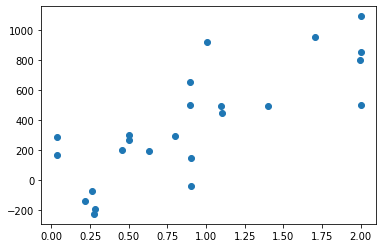

In [ ]:
plt.scatter(distance, velocity)

### If you still remember, in order to do gradient descent, we need a learning rate.

In [ ]:
model = linearRegression()

learningRate = 0.01
epochs = 1000

# criterion -> loss function
criterion = torch.nn.MSELoss()
# Just the loss function : here we use the default MSELoss()

# optimizer -> the method to update the parameters
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [ ]:
import time
loss_array = []
epoch_array = []
start_time = time.time()
for epoch in range(epochs):
    # Standard 
    # Training steps
    #
    #------------------------------------------------------------------------------

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)

    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()
    #----------------------------------------------------------------------------------

    epoch_array.append(epoch)
    loss_array.append(float(loss.cpu().detach().numpy()))
    #if epoch // 100 ==0:
    #print('epoch {}, loss {}'.format(epoch, loss.item()))
end_time = time.time()
print(end_time-start_time)

0.17298102378845215


(0.0, 100.0)

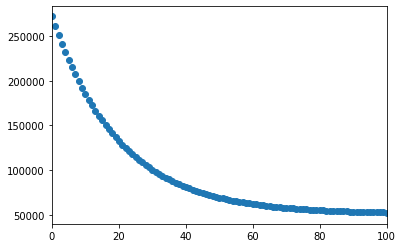

In [ ]:
plt.scatter(epoch_array,loss_array)
plt.xlim(0,100)

In [ ]:
n = np.array(np.arange(0,2,0.01),dtype=np.float32)
t = torch.from_numpy(n).reshape(-1,1)

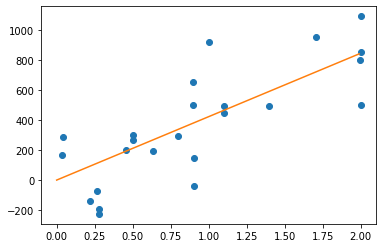

In [ ]:
predicted = model(t).data.numpy()
plt.scatter(distance,velocity)
plt.plot(n,predicted,color='C1')

In [ ]:
for param in model.parameters():
    print(param.data)

tensor([[422.7206]])


### Recap a model in Pytorch 


```
class linearRegression(torch.nn.Module):         #  This is the basic structure of a model used by Pytorch
    def __init__(self):                          #
        super(linearRegression, self).__init__() #
        '''
        Here is the part you can start to develop
        '''
        inputSize=1
        outputSize=1
        self.linear = torch.nn.Linear(inputSize, outputSize,bias=False)

    def forward(self, x): #
        out = self.linear(x)
        
        return out

```


```
model = linearRegression()

learningRate = 0.1
epochs = 1000

# criterion -> loss function
criterion = torch.nn.MSELoss() 
# Just the loss function : here we use the default MSELoss()

# optimizer -> the method to update the parameters
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

```



```
for epoch in range(epochs):
    # Standard 
    # Training steps
    #
    #------------------------------------------------------------------------------

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)

    # get gradients w.r.t to parameters
    loss.backward() 

    # update parameters
    optimizer.step()
```





### Now let's revisit our QSO-star dataset

In [ ]:
def completeness_purity(true_value, prediction):
    
    number_total_qso = len(np.where(true_value==1)[0])
    number_of_qso_as_qso = len(np.where((true_value==1) & (prediction==1))[0])
    number_of_qso_as_not_qso = len(np.where((true_value==1) & (prediction==0))[0])

    number_pred_qso = len(np.where(prediction==1)[0])
    number_of_pred_as_qso = len(np.where((true_value==0) & (prediction==1))[0])
    
    completeness = number_of_qso_as_qso*1.0/number_total_qso
    purity = number_of_qso_as_qso*1.0/number_pred_qso
    return completeness, purity

-----------------------------------

In [ ]:
#QSO_star_training https://drive.google.com/file/d/1Q6tFg_Jl-R9DUMh92rU7wt5GS4FfyKgJ/view?usp=sharing
#QSO_star_testing https://drive.google.com/file/d/1pd-NCjD5y5gAXE33R0fd7izMD-86do7J/view?usp=sharing

In [ ]:
training = pf.open(root_dir+'SDSS_QSO_star_training.fits')
test = pf.open(root_dir+'SDSS_QSO_star_testing.fits')

In [ ]:
color_train = torch.from_numpy(np.array(training[0].data,dtype=np.float32)).to(device)
color_test = torch.from_numpy(np.array(test[0].data,dtype=np.float32)).to(device)

In [ ]:
test_labels = np.zeros((len(test[0].data),2))
for i in range(0,len(test_labels)):
    test_labels[i,test[1].data[i]]=1
test_labels = torch.from_numpy(np.array(test_labels,dtype=np.float32)).to(device)

In [ ]:
train_labels = np.zeros((len(training[0].data),2))
for i in range(0,len(train_labels)):
    train_labels[i,training[1].data[i]]=1
train_labels = torch.from_numpy(np.array(train_labels,dtype=np.float32)).to(device)

### Four colors four inputs

Text(0, 0.5, 'g-r')

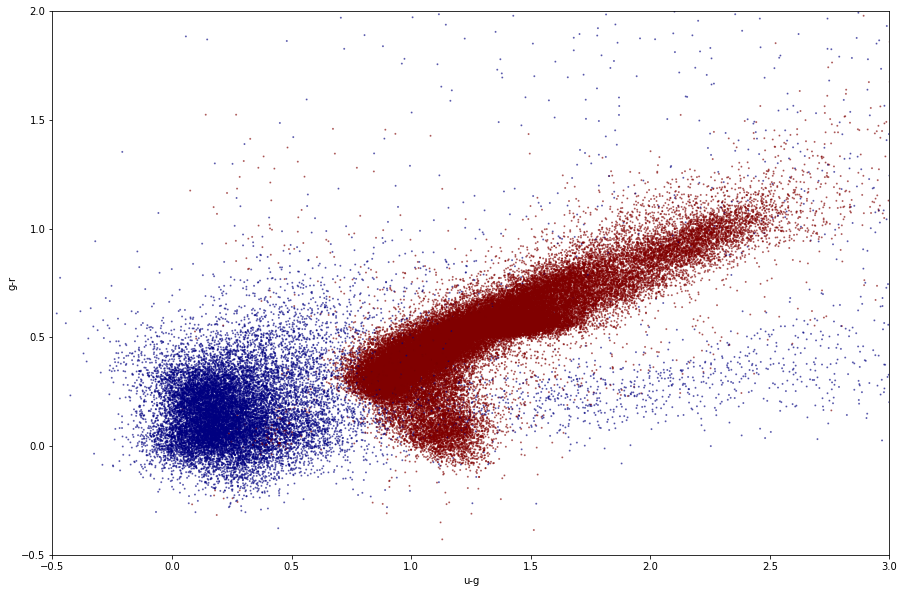

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(training[0].data[:,0],training[0].data[:,1],c=training[1].data,s=1,alpha=0.5,cmap=cm.jet_r)
plt.xlim(-0.5,3)
plt.ylim(-0.5,2)
plt.xlabel('u-g')
plt.ylabel('g-r')

In [ ]:
### Here is the simplist model
class fully_connected_NN_QSO_star(torch.nn.Module):
    def __init__(self):
        super(fully_connected_NN_QSO_star, self).__init__()
        self.fc1 = torch.nn.Sequential(
            torch.nn.Linear(4, 2),
            #torch.nn.ReLU()
            )          
    def forward(self, x):
        x = self.fc1(x)
        out = x
        return out

In [ ]:
model = fully_connected_NN_QSO_star().to(device)

In [ ]:
learningRate = 0.1
epochs = 500
criterion = torch.nn.CrossEntropyLoss()
# Just the loss function : here we use the default CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [ ]:
accuracy_array = []
accuracy_test_array = []
loss_array = []
loss_test_array = []
epoch_array = []
###############################

start_time = time.time()
batch_size = 1024
N_total_train = len(color_train[:,:])
print("epoch","accuracy","loss", "accuracy_test","loss_test")
for epoch in range(epochs):

    ''' simple mini-batch calculation'''
    for start_index_batch in range(0,N_total_train,batch_size):
        # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
        optimizer.zero_grad()
        end_index = min(start_index_batch + batch_size, N_total_train)
        # get output from the model, given the inputs
        outputs = model(color_train[start_index_batch:end_index,:])
        
        # get loss for the predicted output
        loss = criterion(outputs, train_labels[start_index_batch:end_index,:])
        # get gradients w.r.t to parameters
        loss.backward()
        # update parameters
        optimizer.step()
    
    ### Below is for recording the performance metrics
    #------------------------------------------------------------------   
   
    outputs_all = model(color_train)
    pred_y = torch.max(outputs_all, 1)[1].cpu().data.squeeze()
    accuracy = torch.sum(pred_y == torch.from_numpy(np.array(training[1].data,dtype=np.float32))).type(torch.FloatTensor) / pred_y.size(0)

    epoch_array.append(epoch)

    loss_array.append(float(loss.cpu().detach().numpy()))
    accuracy_array.append(float(accuracy.numpy()))


    outputs_test = model(color_test) 
    loss_test = criterion(outputs_test, test_labels)

    pred_y_test = torch.max(outputs_test, 1)[1].cpu().data.squeeze()
    accuracy_test = torch.sum(pred_y_test == torch.from_numpy(np.array(test[1].data,dtype=np.float64))).type(torch.FloatTensor) / pred_y_test.size(0)
    accuracy_test_array.append(float(accuracy_test.numpy()))
    loss_test_array.append(float(loss_test.cpu().detach().numpy()))

    if epoch % 50 ==0:
        print(epoch,accuracy.numpy(),loss.cpu().detach().numpy(), accuracy_test.numpy(),loss_test.cpu().detach().numpy())

    #----------------------------------------------------------------------
    
print(time.time()-start_time)

epoch accuracy loss accuracy_test loss_test
0 0.7904757 0.4177804 0.7851287 0.41302934
50 0.9631549 0.3351604 0.960859 0.3414177
100 0.96324474 0.33348417 0.96212906 0.33985606
150 0.96294963 0.33330756 0.9615518 0.33945885
200 0.9626674 0.33328542 0.9615518 0.3393369
250 0.9626033 0.33328128 0.96143633 0.33929273
300 0.96250063 0.33327922 0.9615518 0.33927467
350 0.96241087 0.33327773 0.96166724 0.33926675
400 0.96237236 0.3332767 0.9615518 0.3392631
450 0.9623467 0.33327588 0.9615518 0.3392614
25.9588041305542


In [ ]:
# Print completeness and purity for the test dataset
completeness_purity(test[1].data,pred_y_test.numpy())

### This is logistic regression in fact.

(0.850925925925926, 0.9945887445887446)

In [ ]:
#torch.save(model, root_dir+'my_model_example')


In [ ]:
for param in model.parameters():
    print(param.data)

tensor([[ 1.9352,  0.9376, -0.8765, -2.2334],
        [-1.5728, -0.7578,  0.9579,  2.4142]], device='cuda:0')
tensor([-1.0515,  0.9160], device='cuda:0')


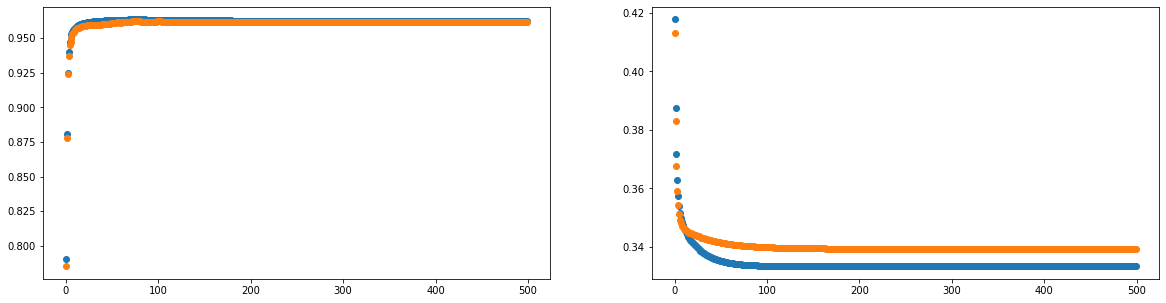

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(epoch_array,accuracy_array)
plt.scatter(epoch_array,accuracy_test_array)
plt.subplot(1,2,2)
plt.scatter(epoch_array,loss_array)
plt.scatter(epoch_array,loss_test_array)


### Exercise or Challenge: Try to build a model with performance accuracy>0.99 and Com x Purity > 0.966

### Our QSO-star separation performance with different methods

# Can neural networks do better?

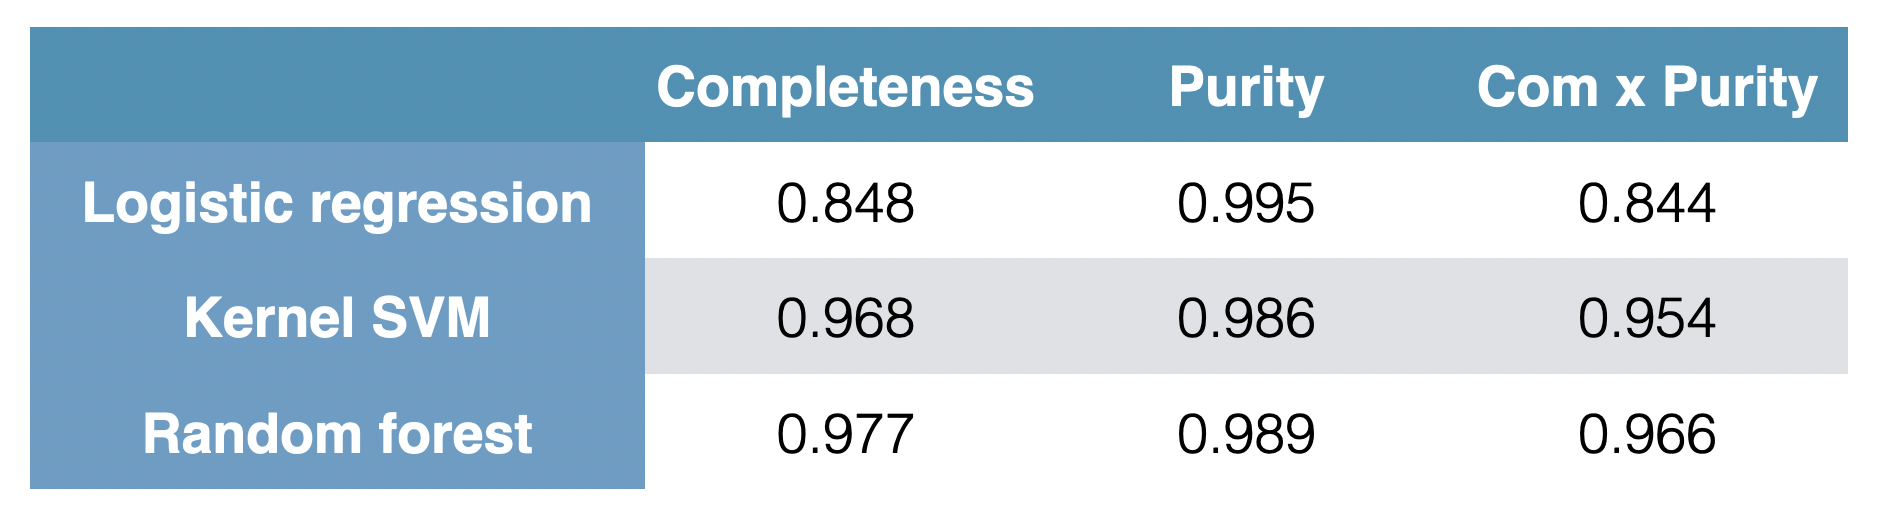

#TW's best model: Completeness:0.979 Purity:0.989 -> 0.968